In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sn

In [4]:
df = pd.read_csv("/content/drive/MyDrive/last_master.csv")
pd.set_option('display.max_columns', None)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/last_master.csv'

In [ ]:
# prompt: export 10 data pertama dari df

df_10 = df.head(10)
df_10.to_csv('df_10.csv', index=False)


In [ ]:
for i in df:
  print(i)

Penghasilan_setelah_dipotong_pajak
Kondisi_Agunan
Asuransi_Agunan
Status_Lunas_Agunan
Jumlah_Agunan
Nilai_Agunan
Mutasi_Rekening
id
dp_id
arsip_id
synced
invalid
sync_id
master_id
nik
nkk
no_ktp
kab_id
kec_id
kel_id
nama
jenis_kelamin
tanggal_lahir
tempat_lahir
kawin
alamat
rw
rt
dusun
Unnamed: 22
k2
k3
detached
sumberdata
status
status_tps
tps_id
saringan_id
difabel
ektp
rank
keterangan
files_id
updated_at
prov_id_ktp
kab_id_ktp
kec_id_ktp
kel_id_ktp
tahapan_id
Nama_Tempat_Bekerja
Alamat_Tempat_Kerja
Validasi_Alamat_Tempat_Kerja
Alamat_Domisili_Tempat_Kerja
Kode_Pos
Keberadaan_Tempat_Kerja
Aktivitas_Tempat_Kerja
Status_Kerja
Kategori_Penghasilan
Pengeluaran_dalam_Sebulan
SES_(Strata_Ekonomi_Status)
Catatan_Surveyor
Sumber_Info_1
Sumber_Info_2
Rekomendasi_Surveyor
Foto_Bangunan_Kantor
Foto_Lingkungan_Kantor
Foto_Aktivitas_Kantor
Geotagging
Foto_Dokumen
Pekerjaan_Jangka_Panjang_atau_Jangka_Pendek
Jenjang_Karir_Pekerjaan
Izin_Bekerja
Penghasilan
Pekerjaan
status_kepemilikan
lama_tinggal


In [ ]:
#var_rasio = [
 #   'total_pinjaman',
  #  'jangka_waktu_kredit',
   # 'Suku_Bunga',
    #]

# Data Turunan Baru

In [ ]:
df['total_hutang'] = df['total_hutang'].astype(int)
df['loan_to_value_ratio'] = df['total_hutang']/df['Nilai_Agunan']
df['loan_to_value_ratio']

,loan_to_value_ratio
0,0.025384
1,8.159448
2,2.372067
3,26.730082
4,0.321646
...,...
499992,18.472827
499993,0.071243
499994,0.003680
499995,15.214236


In [ ]:
df['Penghasilan_setelah_dipotong_pajak'] = df['Penghasilan_setelah_dipotong_pajak'].astype(int)
df['Pengeluaran_dalam_Sebulan'] = df['Pengeluaran_dalam_Sebulan'].str.replace('.', '').astype(int)

In [ ]:
df['Pengeluaran_dalam_Sebulan'].head()

,Pengeluaran_dalam_Sebulan
0,5208200
1,1544473
2,3470198
3,3792448
4,3405600


In [ ]:
df['Pendapatan_bulanan_tersedia'] = df['Penghasilan_setelah_dipotong_pajak'] - df['Pengeluaran_dalam_Sebulan']
for i in df['Pendapatan_bulanan_tersedia']:
    if i < 0:
        i = 0

df['Pendapatan_bulanan_tersedia']

,Pendapatan_bulanan_tersedia
0,204119
1,4959391
2,7554185
3,1546173
4,2654069
...,...
499992,660908
499993,2148916
499994,-61086
499995,3468074


In [ ]:
var = [
    'jumlah_aset',
    'frekuensi_hutang',
    'modal',
    'Modal_barang',
    'Networking(Jaringan)',
    'Aset_Maya',
    'surat_berharga',
    'tabungan',
    'Mutasi_Rekening',
    'keluarga_besar',
    'status_kepemilikan_aset',
    'Laporan_keuangan_aset',
    'hutang_1',
    'hutang_2',
    'hutang_lainnya',
    'total_hutang',
    'aset',
    'aset.1',
    'aset_lainnya',
    'total_asset',
    'Penghasilan_setelah_dipotong_pajak',
    'Nilai_Agunan',
    'Jumlah_Agunan',
    'Status_Lunas_Agunan',
    'harga_aset_lainnya',
    'aset_mobil',
    'aset_motor',
    #'tujuan_pinjaman'
    'loan_to_value_ratio', ##new!
    'Pendapatan_bulanan_tersedia', ##new!
]

In [ ]:
df_cap = df[var]
df_cap

,jumlah_aset,frekuensi_hutang,modal,Modal_barang,Networking(Jaringan),Aset_Maya,surat_berharga,tabungan,Mutasi_Rekening,keluarga_besar,status_kepemilikan_aset,Laporan_keuangan_aset,hutang_1,hutang_2,hutang_lainnya,total_hutang,aset,aset.1,aset_lainnya,total_asset,Penghasilan_setelah_dipotong_pajak,Nilai_Agunan,Jumlah_Agunan,Status_Lunas_Agunan,harga_aset_lainnya,aset_mobil,aset_motor,loan_to_value_ratio,Pendapatan_bulanan_tersedia
0,-1.264947,-0.725112,Mikro,1.456910,non_maya,-1,Tidak Ada,1.019095,1.070851,Sedang,Non-Pribadi,1,1.556528,-0.812371,-0.823161,18860616,mobil,Tanah,1,0.132325,5412319,743014120,5,Lunas,2789016506,1,0,0.025384,204119
1,1.266965,0.175121,Kecil,1.676831,maya,-1,Tidak Ada,1.621209,-0.676608,Buruk,Non-Pribadi,1,-0.796737,-1.117826,0.160378,16609674,mobil dan motor,Sepeda,1,-0.444716,6503864,2035637,8,Lunas,1628674892,1,1,8.159448,4959391
2,-1.264947,0.798358,Kecil,1.059361,maya,2,Tidak Ada,0.551374,1.136823,Buruk,Non-Pribadi,1,0.844612,-1.173872,-1.376175,16362915,mobil,Saham,1,1.058543,11024383,6898168,7,Belum Lunas,4029749552,1,0,2.372067,7554185
3,-0.631969,0.313618,Menengah,1.336072,non_maya,1,Tidak Ada,-0.524999,-0.553126,Sedang,Pribadi,1,-1.026058,1.507398,0.219236,25875495,mobil,Tanah,1,-0.168054,5338621,968029,9,Lunas,2335677044,1,0,26.730082,1546173
4,1.266965,1.629342,Menengah,-1.612770,maya,-1,Tidak Ada,0.418034,-0.301118,Baik,Pribadi,1,-0.100103,0.803441,-0.976275,24118729,mobil dan motor,Tanah,1,-0.855337,6059669,74985366,4,Lunas,1218606975,1,1,0.321646,2654069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499992,0.633987,0.175121,Menengah,-0.308594,maya,2,Tidak Ada,0.441149,0.200647,Sedang,Non-Pribadi,1,-0.887299,-0.674131,-0.501998,4884234,mobil dan motor,Saham,1,0.079512,4750302,264401,6,Belum Lunas,2539545789,1,1,18.472827,660908
499993,1.266965,1.283099,Kecil,0.339300,maya,0,Surat Utang Negara,0.577294,1.131045,Sedang,Pribadi,1,-0.663507,0.926155,0.896517,5543471,mobil dan motor,Saham,1,0.754934,3667948,77810232,4,Lunas,3599518247,1,1,0.071243,2148916
499994,1.266965,-0.101874,Kecil,-0.992794,non_maya,0,Tidak Ada,0.380040,-0.485602,Buruk,Non-Pribadi,1,0.811319,0.023727,-0.170870,1402499,mobil dan motor,Perusahaan,1,-0.721926,1965224,381085568,3,Lunas,1252917285,1,1,0.003680,-61086
499995,0.633987,0.036623,Mikro,1.413282,maya,0,Tidak Ada,0.231096,1.383209,Baik,Non-Pribadi,1,-0.870231,-0.238651,1.390742,6236437,mobil dan motor,Tanah,1,-1.281107,8311060,409908,3,Lunas,728289812,1,1,15.214236,3468074


In [ ]:
df_cap.drop(columns=['aset'])

,jumlah_aset,frekuensi_hutang,modal,Modal_barang,Networking(Jaringan),Aset_Maya,surat_berharga,tabungan,Mutasi_Rekening,keluarga_besar,status_kepemilikan_aset,Laporan_keuangan_aset,hutang_1,hutang_2,hutang_lainnya,total_hutang,aset.1,aset_lainnya,total_asset,Penghasilan_setelah_dipotong_pajak,Nilai_Agunan,Jumlah_Agunan,Status_Lunas_Agunan,harga_aset_lainnya,aset_mobil,aset_motor,loan_to_value_ratio,Pendapatan_bulanan_tersedia
0,-1.264947,-0.725112,Mikro,1.456910,non_maya,-1,Tidak Ada,1.019095,1.070851,Sedang,Non-Pribadi,1,1.556528,-0.812371,-0.823161,18860616,Tanah,1,0.132325,5412319,743014120,5,Lunas,2789016506,1,0,0.025384,204119
1,1.266965,0.175121,Kecil,1.676831,maya,-1,Tidak Ada,1.621209,-0.676608,Buruk,Non-Pribadi,1,-0.796737,-1.117826,0.160378,16609674,Sepeda,1,-0.444716,6503864,2035637,8,Lunas,1628674892,1,1,8.159448,4959391
2,-1.264947,0.798358,Kecil,1.059361,maya,2,Tidak Ada,0.551374,1.136823,Buruk,Non-Pribadi,1,0.844612,-1.173872,-1.376175,16362915,Saham,1,1.058543,11024383,6898168,7,Belum Lunas,4029749552,1,0,2.372067,7554185
3,-0.631969,0.313618,Menengah,1.336072,non_maya,1,Tidak Ada,-0.524999,-0.553126,Sedang,Pribadi,1,-1.026058,1.507398,0.219236,25875495,Tanah,1,-0.168054,5338621,968029,9,Lunas,2335677044,1,0,26.730082,1546173
4,1.266965,1.629342,Menengah,-1.612770,maya,-1,Tidak Ada,0.418034,-0.301118,Baik,Pribadi,1,-0.100103,0.803441,-0.976275,24118729,Tanah,1,-0.855337,6059669,74985366,4,Lunas,1218606975,1,1,0.321646,2654069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499992,0.633987,0.175121,Menengah,-0.308594,maya,2,Tidak Ada,0.441149,0.200647,Sedang,Non-Pribadi,1,-0.887299,-0.674131,-0.501998,4884234,Saham,1,0.079512,4750302,264401,6,Belum Lunas,2539545789,1,1,18.472827,660908
499993,1.266965,1.283099,Kecil,0.339300,maya,0,Surat Utang Negara,0.577294,1.131045,Sedang,Pribadi,1,-0.663507,0.926155,0.896517,5543471,Saham,1,0.754934,3667948,77810232,4,Lunas,3599518247,1,1,0.071243,2148916
499994,1.266965,-0.101874,Kecil,-0.992794,non_maya,0,Tidak Ada,0.380040,-0.485602,Buruk,Non-Pribadi,1,0.811319,0.023727,-0.170870,1402499,Perusahaan,1,-0.721926,1965224,381085568,3,Lunas,1252917285,1,1,0.003680,-61086
499995,0.633987,0.036623,Mikro,1.413282,maya,0,Tidak Ada,0.231096,1.383209,Baik,Non-Pribadi,1,-0.870231,-0.238651,1.390742,6236437,Tanah,1,-1.281107,8311060,409908,3,Lunas,728289812,1,1,15.214236,3468074


In [ ]:
df_cap.isnull().sum()

,0
jumlah_aset,0
frekuensi_hutang,0
modal,0
Modal_barang,70254
Networking(Jaringan),0
Aset_Maya,0
surat_berharga,0
tabungan,0
Mutasi_Rekening,0
keluarga_besar,0


In [ ]:
df_cap = df_cap.dropna()
df_cap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 429743 entries, 0 to 499996
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   jumlah_aset                         429743 non-null  float64
 1   frekuensi_hutang                    429743 non-null  float64
 2   modal                               429743 non-null  object 
 3   Modal_barang                        429743 non-null  float64
 4   Networking(Jaringan)                429743 non-null  object 
 5   Aset_Maya                           429743 non-null  int64  
 6   surat_berharga                      429743 non-null  object 
 7   tabungan                            429743 non-null  float64
 8   Mutasi_Rekening                     429743 non-null  float64
 9   keluarga_besar                      429743 non-null  object 
 10  status_kepemilikan_aset             429743 non-null  object 
 11  Laporan_keuangan_aset          

# Scalling and Encoding

Data collecting

In [ ]:
catVar = [
    'modal',
    'Networking(Jaringan)',
    'surat_berharga',
    'keluarga_besar',
    'status_kepemilikan_aset',
    'aset.1',
    'Status_Lunas_Agunan',
]
numVar = [
    'Penghasilan_setelah_dipotong_pajak',
    'Nilai_Agunan',
    'Jumlah_Agunan',
    'harga_aset_lainnya',
    'loan_to_value_ratio',
    'Pendapatan_bulanan_tersedia'
]
fixed = [
  'jumlah_aset',
  'frekuensi_hutang',
  'Modal_barang',
  'Aset_Maya',
  'tabungan',
  'Mutasi_Rekening',
  'Laporan_keuangan_aset',
  'hutang_1',
  'hutang_2',
  'hutang_lainnya',
  'total_hutang',
  'aset_lainnya',
  'total_asset',
  'aset_mobil',
  'aset_motor'
  ]

df_cat = df_cap[catVar]
df_num = df_cap[numVar]
df_fixed = df_cap[fixed]

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
scaler = StandardScaler()
encoder = OneHotEncoder(sparse_output=False)

numerik_1_scaled = scaler.fit_transform(df_num)
numerik_1_scaled = pd.DataFrame(numerik_1_scaled, columns=df_num.columns)  # Konversi ke DataFrame

categorical_1_encoded = encoder.fit_transform(df_cat)
categorical_1_encoded = pd.DataFrame(categorical_1_encoded, columns=encoder.get_feature_names_out(df_cat.columns))  # Konversi ke DataFrame

In [ ]:
categorical_1_encoded = categorical_1_encoded.rename(columns={'aset_mobil': 'aset_mobil2'})
#one hot encoding menghasilkan fitur baru namun nama sama dengan fitur yang sudah ada
#'aset_mobil' dijadikan 'aset_mobil2' karena 'aset_mobil' sudah ada agar tidak error

In [ ]:
import joblib
# Simpan scaler
scaler_path = 'scaler.joblib'
joblib.dump(scaler, scaler_path)

# Simpan encoder
encoder_path = 'encoder.joblib'
joblib.dump(encoder, encoder_path)

['encoder.joblib']

In [ ]:
df_cap = pd.concat([numerik_1_scaled,df_fixed, categorical_1_encoded], axis=1)

In [ ]:
df_cap.isnull().sum()

,0
Penghasilan_setelah_dipotong_pajak,60343
Nilai_Agunan,60343
Jumlah_Agunan,60343
harga_aset_lainnya,60343
loan_to_value_ratio,60343
Pendapatan_bulanan_tersedia,60343
jumlah_aset,60343
frekuensi_hutang,60343
Modal_barang,60343
Aset_Maya,60343


In [ ]:
df_cap = df_cap.dropna()

In [ ]:
df_cap.isnull().sum()

,0
Penghasilan_setelah_dipotong_pajak,0
Nilai_Agunan,0
Jumlah_Agunan,0
harga_aset_lainnya,0
loan_to_value_ratio,0
Pendapatan_bulanan_tersedia,0
jumlah_aset,0
frekuensi_hutang,0
Modal_barang,0
Aset_Maya,0


In [ ]:
df_cap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369397 entries, 0 to 429742
Data columns (total 47 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Penghasilan_setelah_dipotong_pajak       369397 non-null  float64
 1   Nilai_Agunan                             369397 non-null  float64
 2   Jumlah_Agunan                            369397 non-null  float64
 3   harga_aset_lainnya                       369397 non-null  float64
 4   loan_to_value_ratio                      369397 non-null  float64
 5   Pendapatan_bulanan_tersedia              369397 non-null  float64
 6   jumlah_aset                              369397 non-null  float64
 7   frekuensi_hutang                         369397 non-null  float64
 8   Modal_barang                             369397 non-null  float64
 9   Aset_Maya                                369397 non-null  float64
 10  tabungan                             

In [ ]:
sampled_data = df_cap.sample(frac=0.5, random_state=42) #sampling data karena terlalu banyak
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184700 entries, 339561 to 276993
Data columns (total 45 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Penghasilan_setelah_dipotong_pajak       184700 non-null  float64
 1   Nilai_Agunan                             184700 non-null  float64
 2   Jumlah_Agunan                            184700 non-null  float64
 3   harga_aset_lainnya                       184700 non-null  float64
 4   loan_to_value_ratio                      184700 non-null  float64
 5   Pendapatan_bulanan_tersedia              184700 non-null  float64
 6   jumlah_aset                              184700 non-null  float64
 7   frekuensi_hutang                         184700 non-null  float64
 8   Modal_barang                             184700 non-null  float64
 9   Aset_Maya                                184700 non-null  float64
 10  tabungan                        

# Data Clustering

In [ ]:
from sklearn.decomposition import PCA #mengurangi dimensi data dengan PCA
from sklearn.cluster import KMeans

In [ ]:
inertia = []

In [ ]:
# Inisiasi KMeans dan fit data

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  clusters = kmeans.fit(sampled_data)
  inertia.append(kmeans.inertia_)

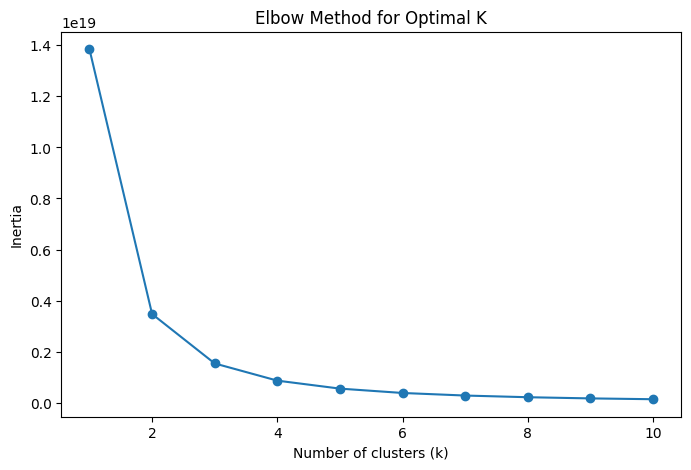

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

Berdasarkan grafik diatas teradi penurunan signifikan setelah K = 3. maka akan ditetapkan cluster = 3 sebagai bahan uji

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(sampled_data)

In [ ]:
# Tambahkan label cluster ke DataFrame
sampled_data['Cluster'] = clusters

In [ ]:
sampled_data.head()

,Penghasilan_setelah_dipotong_pajak,Nilai_Agunan,Jumlah_Agunan,harga_aset_lainnya,loan_to_value_ratio,Pendapatan_bulanan_tersedia,jumlah_aset,frekuensi_hutang,Modal_barang,Aset_Maya,tabungan,Mutasi_Rekening,Laporan_keuangan_aset,hutang_1,hutang_2,hutang_lainnya,total_hutang,aset_lainnya,total_asset,aset_mobil,aset_motor,modal_Kecil,modal_Menengah,modal_Mikro,Networking(Jaringan)_maya,Networking(Jaringan)_non_maya,surat_berharga_Exchange Traded Fund,surat_berharga_Hak Kekayaan Intelektual,surat_berharga_Obligasi Korporasi,surat_berharga_Reksadana Pasar Uang,surat_berharga_Sukuk,surat_berharga_Surat Utang Negara,surat_berharga_Tidak Ada,keluarga_besar_Baik,keluarga_besar_Buruk,keluarga_besar_Sedang,status_kepemilikan_aset_Non-Pribadi,status_kepemilikan_aset_Pribadi,aset.1_Perusahaan,aset.1_Rumah,aset.1_Saham,aset.1_Sepeda,aset.1_Tanah,Status_Lunas_Agunan_Belum Lunas,Status_Lunas_Agunan_Lunas,Cluster
339561,-0.201893,-0.465048,-0.871779,-0.744089,-0.003151,-0.170262,0.633987,1.421596,-1.543460,2.0,0.641499,1.479410,1.0,-0.624503,-0.206511,0.870153,5667801.0,1.0,-0.952264,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2
352825,-0.483342,2.375612,1.568519,-0.073892,-0.003157,-0.105109,0.001009,-0.309620,-0.211793,-1.0,-1.629060,1.732316,1.0,-0.517476,0.575450,0.555635,3851474.0,1.0,-0.236603,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2
152196,-0.614080,-0.544704,0.522677,1.621339,-0.000754,-0.611112,0.001009,1.352348,-1.188713,1.0,1.270041,1.289505,1.0,0.742215,-0.463579,0.920397,24141462.0,1.0,-0.008278,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
292625,2.877167,-0.545628,-0.523165,1.409615,0.025486,0.840140,-1.264947,-1.140604,-0.191686,2.0,-1.395851,-0.517535,1.0,-1.329243,0.914821,1.423214,26007846.0,1.0,-0.917050,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
159612,-0.592318,2.583476,-1.569006,-1.425321,-0.003157,-0.318296,-1.897925,-1.417599,1.278665,0.0,1.445640,0.148424,1.0,-1.289667,-0.386724,-1.293391,14257241.0,1.0,0.313717,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


In [ ]:
sampled_data["Cluster"].value_counts()

,count
Cluster,
1,62041
0,61626
2,61033


In [ ]:
# Analisis klaster
print(sampled_data.groupby('Cluster').mean())


         Penghasilan_setelah_dipotong_pajak  Nilai_Agunan  Jumlah_Agunan  \
Cluster                                                                    
0                                  0.004529     -0.000551       0.001487   
1                                  0.008616      0.001073      -0.003697   
2                                 -0.003246     -0.002324      -0.005359   

         harga_aset_lainnya  loan_to_value_ratio  Pendapatan_bulanan_tersedia  \
Cluster                                                                         
0                 -0.003944            -0.001330                     0.007027   
1                  0.002497            -0.001260                     0.004290   
2                  0.002858            -0.001728                    -0.000537   

         jumlah_aset  frekuensi_hutang  Modal_barang  Aset_Maya  tabungan  \
Cluster                                                                     
0           0.006997          0.004556      0.006295   0.49

berdasarkan hasil rata-rata:
*   Interpretasi Cluster 0: Nasabah di cluster ini cenderung memiliki aset dan pendapatan yang cukup baik, meskipun nilai agunan mereka lebih rendah. Mereka juga lebih cenderung memiliki aset digital dan proporsi kendaraan pribadi yang lebih tinggi, serta distribusi hutang yang tidak terlalu besar.
*   Interpretasi Cluster 1: Nasabah di cluster ini cenderung memiliki pendapatan bulanan dan aset yang lebih baik, serta proporsi hutang yang lebih rendah. Mereka cenderung memiliki keuangan yang lebih stabil dengan banyak agunan yang sudah lunas.
*   Interpretasi Cluster 2: Nasabah di cluster ini memiliki pendapatan setelah pajak yang paling tinggi, tetapi jumlah aset yang sedikit lebih rendah. Mereka cenderung memiliki hutang yang sedikit lebih besar, namun sebagian besar agunan mereka sudah lunas, menunjukkan stabilitas keuangan yang moderat.

Kesimpulan Label Berdasarkan Capital:
* Cluster 0: Nasabah Berpotensi (Emerging Capital)
Aset dan pendapatan baik, agunan rendah, risiko moderat.

* Cluster 1: Nasabah Kuat (Strong Capital)
Pendapatan dan aset tinggi, hutang rendah, agunan sudah lunas, risiko rendah.

* Cluster 2: Nasabah Berisiko Terkelola (Moderate-Risk Capital)
Pendapatan tinggi, hutang lebih besar, aset lebih rendah, agunan lunas, risiko moderat.

# Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X = sampled_data.drop(columns=['Cluster'])
y = sampled_data['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_test.head(10).to_csv('test_ril2.csv', index=False)

In [ ]:
X_test.head()

,Penghasilan_setelah_dipotong_pajak,Nilai_Agunan,Jumlah_Agunan,harga_aset_lainnya,loan_to_value_ratio,Pendapatan_bulanan_tersedia,jumlah_aset,frekuensi_hutang,Modal_barang,Aset_Maya,tabungan,Mutasi_Rekening,Laporan_keuangan_aset,hutang_1,hutang_2,hutang_lainnya,total_hutang,aset_lainnya,total_asset,aset_mobil,aset_motor,modal_Kecil,modal_Menengah,modal_Mikro,Networking(Jaringan)_maya,Networking(Jaringan)_non_maya,surat_berharga_Exchange Traded Fund,surat_berharga_Hak Kekayaan Intelektual,surat_berharga_Obligasi Korporasi,surat_berharga_Reksadana Pasar Uang,surat_berharga_Sukuk,surat_berharga_Surat Utang Negara,surat_berharga_Tidak Ada,keluarga_besar_Baik,keluarga_besar_Buruk,keluarga_besar_Sedang,status_kepemilikan_aset_Non-Pribadi,status_kepemilikan_aset_Pribadi,aset_mobil2,aset_mobil dan motor,aset_motor,aset_tidak ada,aset.1_Perusahaan,aset.1_Rumah,aset.1_Saham,aset.1_Sepeda,aset.1_Tanah,Status_Lunas_Agunan_Belum Lunas,Status_Lunas_Agunan_Lunas
349879,-0.084030,-0.517164,-0.523165,-0.670277,-0.003060,-0.569146,0.633987,-0.517366,-1.415930,1.0,-1.714229,-0.226295,1.0,1.398150,-1.274549,-0.791974,13595306.0,1.0,-0.951792,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
178245,-0.629183,-0.267186,0.871291,-1.011183,-0.003148,-0.493879,1.899943,0.867607,-1.187841,1.0,1.077034,0.802181,1.0,0.432078,1.024028,-0.495743,20912455.0,1.0,1.064311,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
77124,0.086352,2.283243,0.522677,0.621642,-0.003156,0.289292,0.001009,0.590612,0.265362,0.0,-1.476441,0.591048,1.0,0.943515,0.970392,0.006808,16027118.0,1.0,0.113196,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
263512,-0.581463,-0.538540,-1.220393,-0.813149,-0.002799,-0.399478,-1.897925,0.521364,1.316447,0.0,0.327483,0.916664,1.0,0.999119,-0.874707,0.712111,26168937.0,1.0,-1.556768,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11631,0.943569,-0.545381,0.174063,0.728154,0.003112,1.222565,1.899943,1.421596,-0.044815,1.0,-1.551162,0.900112,1.0,0.664380,1.407470,-0.196862,9041086.0,1.0,1.757591,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# Balancing Label

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC, ADASYN

In [ ]:
sampled_data["Cluster"].value_counts()

,count
Cluster,
1,62041
0,61626
2,61033


In [ ]:
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_smotenc,y_train_smotenc = undersampler.fit_resample(X_train,y_train)

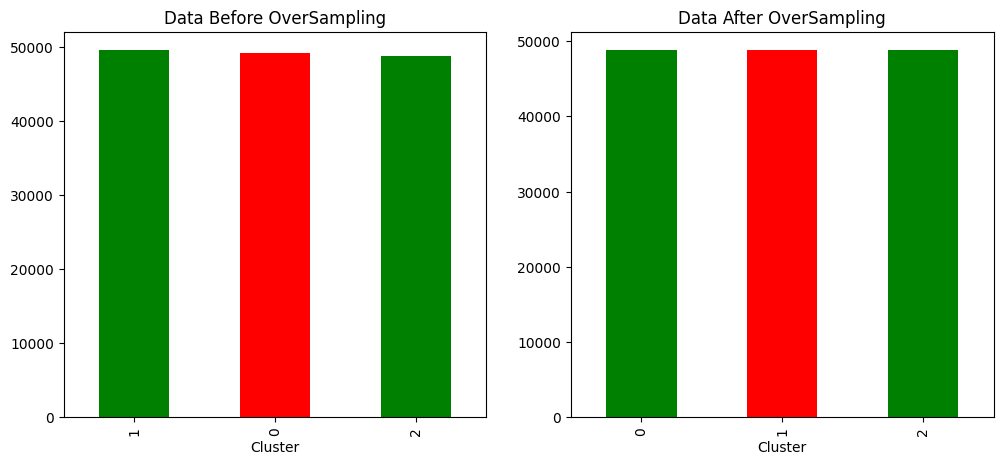

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(121)
y_train.value_counts().plot(kind='bar',color=['g','r'])
plt.title("Data Before OverSampling");
plt.subplot(122)
y_train_smotenc.value_counts().plot(kind='bar',color=['g','r'])
plt.title("Data After OverSampling");

In [ ]:
y_train_smotenc.value_counts()

,count
Cluster,
0,48826
1,48826
2,48826


# Pipeline

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler, PowerTransformer

from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.compose import  ColumnTransformer

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
#num_preprocessor = Pipeline([("num_scaler", PowerTransformer())])
#cat_preprocessor = Pipeline([("cat_onehot", OneHotEncoder())])

#num_columns = X_train.select_dtypes(include=np.number).columns
#cat_columns = X_train.select_dtypes(exclude=np.number).columns

#preprocess = ColumnTransformer([("num_pipe", num_preprocessor, num_columns),
#                                ("cat_pipe", cat_preprocessor, cat_columns)])

#gradB_pipeline = Pipeline([("preprocess_pipe",preprocess),
 #                            ("model", GradientBoostingClassifier())])

set_config(display='diagram')

gradB_pipeline

NameError: name 'preprocess' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

gboost_param = {
    'n_estimators': [20],
    'learning_rate': [0.0001],
    'subsample': [0.1],
    'max_features': [1]
}
gradB = GradientBoostingClassifier()
gradB_random_search = RandomizedSearchCV(estimator = GradientBoostingClassifier(),
                                       param_distributions=gboost_param,
                                       cv=5,
                                       scoring='accuracy',
                                       error_score='raise',
                                       return_train_score=True)

gradB_random_search = gradB_random_search.fit(X_train_smotenc, y_train_smotenc)

print("Best set of hyperparameters for GBM: ", gradB_random_search.best_params_)
print("Best score for GBM: ", gradB_random_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best set of hyperparameters for GBM:  {'subsample': 0.1, 'n_estimators': 20, 'max_features': 1, 'learning_rate': 0.0001}
Best score for GBM:  0.9146223576550299


In [ ]:
X_train_smotenc.head(10).to_csv('test2.csv', index=False)

In [ ]:
import pickle
with open('capital.pkl', 'wb') as c:
  pickle.dump(gradB_random_search, c)

In [ ]:
import sklearn
print(sklearn.__version__)

1.5.2


In [ ]:
import joblib

# Save model using joblib instead of pickle
joblib.dump(gradB_random_search, 'model_test.joblib')


['model_test.joblib']

In [ ]:
for i in df_cap:
  print(i)

jumlah_aset
frekuensi_hutang
modal
Modal_barang
Networking(Jaringan)
Aset_Maya
surat_berharga
tabungan
Mutasi_Rekening
keluarga_besar
status_kepemilikan_aset
Laporan_keuangan_aset
hutang_1
hutang_2
hutang_lainnya
total_hutang
aset
aset.1
aset_lainnya
total_asset
Penghasilan_setelah_dipotong_pajak
Nilai_Agunan
Jumlah_Agunan
Status_Lunas_Agunan
harga_aset_lainnya
aset_mobil
aset_motor
loan_to_value_ratio
Pendapatan_bulanan_tersedia
Pinjaman_dapat_diberikan


In [ ]:
!pip install scikit-learn

In [ ]:

!pip install --upgrade scikit-learn

In [ ]:
input = pd.read_csv('/content/df_10.csv')

In [ ]:
input.empty

False